<a href="https://colab.research.google.com/github/Mohan0-Chetri/IT-hub-Chennai-Likelihood-of-an-employee-prone-to-depression-working-from-home./blob/main/IT_HUB%2CChennai_dec_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ABOUT THE DATA**

The dataset has been collected for the purpose of dissertation,
It is about work from home and the effects of it on individuals.

**METHOD OF DATA COLLECTION**

Google forms distributed randomly among the employees in IT,hub Chennai.
Making sure the sample data is not biased neither focuses on any particular popuilation group




**AIM** - To find a pattern/classification where we can predict the likelihood of an employee prone to depression and to choose the best model.


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_excel('/content/Responses.xlsx')

**Exploring and Cleaning the data**

In [ ]:
df.head()

,Timestamp,Email Address,Age,Gender,"What is your highest level of education? (Eg: UG,PG..)",Marital status,Name of your workplace/company. (Eg: Infosys),Are you working from home for the first time?,Do you have children?,Change in your salary due to WFH.,How many members are there in your family (in numbers),Is your spouse working too?,"If yes, please mention the name of your workplace/company of your Spouse. (Eg: Infosys)",What is your family income per month? (in Rs.),What is your personal income per month? (in Rs.),Are you the only earning person in your family?,How satisfied are you with the current work from home arrangement?,How many hours do you work while working from home per day? (Please mention the number of hours alone. Eg: 6),How many hours do you work while at office per day? (Please mention the number of hours alone. Eg: 6),Distance in km to office? (one way),Travel time in minutes to office? (one way),Your toll fees to office per day? (If applicable),Total travel expense to office per day?,I find work-independence and flexibility over my work schedule when I work from home.,I save more time when I work from home compared to regular office.,"Iam spending less money on travelling, parking, work attire etc.",I am highly confident about my work.,I experience job satisfaction when I work from home.,Work from home helps me to avoid politics in my office.,Working from home would allow me to perform my job better than when I work in the office.,I am able to learn more and grow in my carrer,I find it difficult to distinguish between work time and home time.,I experience the of isolation from workplace social network while working from home.,I don't have adequate equipment at my home. (Lack of technical support),I miss physical interaction with others to coordinate complex tasks.,I feel I have limited interaction with mentor for career.,I would miss informal interaction with co-workers.,I feel hostility/resentment from my co-workers.,I have a conducive/relaxed work environment at home.,Working from home would allow me to perform my job better than when I work in the office..1,My family is supportive during Work from Home.,I spend quality time with my family.,I often get distracted from work due to family pressure.,I often get stressed when I attend official calls or meetings at home.,"If I worked from home, I would be able to balance my job and personal life."
0,2021-11-13 14:32:47,victorcastro_g@yahoo.co.in,33,Male,UG,Married,PayPal,No,Yes,Increased,3,Yes,Infosys,2.5 L,200000,No,Neither satisfied Nor dissatisfied,9,8,1,10,O,15,Strongly Agree,Neutral,Strongly Agree,Strongly Agree,Neutral,Neutral,NaN,Neutral,Strongly Agree,Neutral,Strongly Disagree,Agree,Neutral,Agree,Neutral,Agree,Neutral,Agree,Often,Neutral,Neutral,Agree
1,2021-11-13 14:37:16,puahshantha@gmail.com,22,Female,PG,Single,Intellect Design Arena,Yes,No,Same,Nil,Not applicable,Nil,0,20000,Yes,Neither satisfied Nor dissatisfied,13,9,20km,65min,Nil,75,Agree,Disagree,Neutral,Neutral,Disagree,Disagree,NaN,Neutral,Agree,Disagree,Neutral,Strongly Agree,Strongly Agree,Strongly Agree,Neutral,Disagree,Neutral,Agree,Never,Agree,Strongly Agree,Disagree
2,2021-11-13 15:26:54,gonysudhan@gmail.com,27,Male,PG,Single,Accenture,Yes,No,Increased,4,No,0,35000,35000,Yes,Somewhat satisfied,10,9.5,12,30,1,NaN,Agree,Neutral,Disagree,Neutral,Disagree,Strongly Disagree,NaN,Disagree,Agree,Agree,Neutral,Strongly Agree,Agree,Agree,Agree,Disagree,Neutral,Agree,Sometimes,Agree,Agree,Neutral
3,2021-11-13 18:20:18,pavielumalai@gmail.com,22,Female,pg,Single,UntitledOne,Yes,No,Same,4,Not applicable,-,N,15000,No,Somewhat satisfied,6,never been to office,NaN,NaN,NaN,NaN,Agree,Disagree,Agree,Neutral,Neutral,Strongly Agree,NaN,Neutral,Strongly Agree,Agree,Disagree,Agree,Agree,Agree,Disagree,Agree,Disagree,Agree,Often,Agree,Agree,Disagree
4,2021-11-13 18:23:07,samuelibanez7v@gmail.com,25,Male,UG,Single,Tech Mahindra,No,No,Increased,4,Not applicable,NaN,60000,40000,No,Very satisfied,11,9,9.4,30,NaN

In [ ]:
df.shape

(407, 45)

**Since it is a survey data collected using google forms the data is vast, dirty and aims for multiple insights.**

*For my study I will be dropping all the columns which are irrelevent to the aim of the assignment i.e we are concerned with the feelings of an employee and some necessery attributes.*

In [ ]:
df.drop(df.columns[[0, 1, 7,9,11,12,13,15,19,20,21,22]], axis = 1, inplace = True)

In [ ]:
df.isna().sum() #Checking for null values.

Age                                                                                                                0
Gender                                                                                                             0
What is your highest level of education? (Eg: UG,PG..)                                                             0
Marital status                                                                                                     0
Name of your workplace/company. (Eg: Infosys)                                                                      4
Do you have children?                                                                                              0
How many members are there in your family (in numbers)                                                             1
What is your personal income per month? (in Rs.)                                                                   8
How satisfied are you with the current work from home arrangemen

In [ ]:
df.drop(columns=['Working from home would allow me to perform my job better than when I work in the office.'], axis = 1, inplace = True)

In [ ]:
df.dropna(how = 'any',inplace=True) #droping rows with null values.

In [ ]:
df.drop(df.columns[[4,10,16,12,13,18]], axis = 1, inplace = True)

**Replacing user input with valid categorical type.**

In [ ]:

df['What is your highest level of education? (Eg: UG,PG..)'].replace(['Ug','B.Tech','BE','BCA','B.Com (Bank Management)','UG - BE( Mechanical engineering)',
                                                                      'BBA','Graduate','Under Graduation','BA Corporate Secretaryship','B. Com',
                                                                      'B.E','UG (BE)','BE.,','B.E (UG)','B Sc','B.E Mechanical',
                                                                      'U. G','Btech','BCA Comp Science','B.sc statistics','B','B.Com',
                                                                      'Graduation','Bsc statistics','BE ECE','B.Sc','B. E','UG (b.com)'],'UG',inplace=True)

In [ ]:
df['What is your highest level of education? (Eg: UG,PG..)'].replace(['Pg','MBA','Diploma','MCA','M.','Mtech','Msc','M.tech','M.com',
                                                                      'Mba','M.Com','PhD','pg','PGDM','PG.','Msc microbiology','mba','Post graduate',
                                                                      'M.E computer science','M.Tech','M.sc','ME','MBA Systems','M.S'],'PG',inplace=True)

In [ ]:
df['Marital status'].replace('Divorced','Married',inplace=True)


**Renaming the Columns for our convinient**

In [ ]:
df.rename(columns = {'What is your highest level of education? (Eg: UG,PG..)':'Qualification',
                     'How many hours do you work while working from home per day? (Please mention the number of hours alone. Eg: 6)' : 'Working_hour',
                     'I find work-independence and flexibility over my work schedule when I work from home.':'Flexible',
                     'I am highly confident about my work.': 'Confident',
                     'I experience job satisfaction when I work from home.':'Satisfaction',
                     'I am able to learn more and grow in my carrer': 'Learning',
                     'I experience the of isolation from workplace social network while working from home.': 'Isolation',
                     'I don\'t have adequate equipment at my home. (Lack of technical support)' : 'Lack_Ts',
                     'I miss physical interaction with others to coordinate complex tasks.': 'PI_collegue',
                     'I feel I have limited interaction with mentor for career.' : 'IW_Mentor',
                     'I would miss informal interaction with co-workers.': 'IW_co-worker',
                     'I feel hostility/resentment from my co-workers.': 'resentment',
                     'I have a conducive/relaxed work environment at home.':'Conducive',
                     'Working from home would allow me to perform my job better than when I work in the office..1': 'Better_performance',
                     'My family is supportive during Work from Home.': 's_family',
                     'I often get distracted from work due to family pressure.': 'Distraction',
                     'I often get stressed when I attend official calls or meetings at home.': 'Depression',
                     'I spend quality time with my family.':'Family_time',
                     'If I worked from home, I would be able to balance my job and personal life.': 'W_L_Balance',
                     'How satisfied are you with the current work from home arrangement?' : 'Stress',
                     'Do you have children?' : 'children',
                     'How many members are there in your family (in numbers)' : 'Family_member',
                     'What is your personal income per month? (in Rs.)' : 'Salary'}, inplace = True)

In [ ]:
df.head(2)

,Age,Gender,Qualification,Marital status,children,Family_member,Salary,Stress,Working_hour,Flexible,Confident,Satisfaction,Learning,Isolation,Lack_Ts,PI_collegue,IW_Mentor,IW_co-worker,resentment,Conducive,Better_performance,s_family,Family_time,Distraction,Depression,W_L_Balance
0,33,Male,UG,Married,Yes,3,200000,Neither satisfied Nor dissatisfied,9,Strongly Agree,Strongly Agree,Neutral,Neutral,Neutral,Strongly Disagree,Agree,Neutral,Agree,Neutral,Agree,Neutral,Agree,Often,Neutral,Neutral,Agree
1,22,Female,PG,Single,No,Nil,20000,Neither satisfied Nor dissatisfied,13,Agree,Neutral,Disagree,Neutral,Disagree,Neutral,Strongly Agree,Strongly Agree,Strongly Agree,Neutral,Disagree,Neutral,Agree,Never,Agree,Strongly Agree,Disagree


**Replacing the values to valid numbers.**

In [ ]:
df['Working_hour'].replace(['10 hours','10 hrs','108','8 to 10','2022-12-14 00:00:00','~ 10','09:30:00','2022-08-10 00:00:00','2022-08-09 00:00:00',
                              'Flexible hours','9 hrs or 91/2','10hours','2022-06-08 00:00:00'],10,
                              inplace=True)
df['Working_hour'].replace(['9hrs','datetime.datetime(2022, 8, 10, 0, 0)',
       '8 to 9hrs',
       '6to 9',
       '8-9hrs',
        'Average of 9 hrs'],9,
                              inplace=True)

df['Working_hour'].replace(['10 to.11','10-11 hours','11+',
       'More than 10 hours',
        '11 hours', '11 hrs'],11,
                              inplace=True)
df['Working_hour'].replace(['8hrs', '8 hours', '7 to 8', '8 Hours per day','7 to 8 hours','8 hours per day', 8.5],8,
                              inplace=True)
df['Working_hour'].replace([ '12hrs',
       '12 hrs','10 - 12 hrs', '12hours'],12,
                              inplace=True)
df['Working_hour'].replace('13 hours',13,
                              inplace=True)
df['Working_hour'].replace(['14+',],15,
                              inplace=True)
df['Working_hour'].replace(['5hrs min','5 to 6','-',],5,
                              inplace=True)
df['Working_hour'].replace([ 'Unemployed'],0,
                              inplace=True)

In [ ]:
df['Working_hour'].astype(int)

0       9
1      13
2      10
3       6
4      11
       ..
402     8
403     6
404     6
405    10
406     9
Name: Working_hour, Length: 373, dtype: int64

In [ ]:
df['Family_member'].replace('Nil',1,inplace=True)
df['Family_member'].astype(int)

0      3
1      1
2      4
3      4
4      4
      ..
402    2
403    4
404    5
405    2
406    4
Name: Family_member, Length: 373, dtype: int64

In [ ]:
df['Salary'].replace(['na','Not applicable','Nil',"Can't share",'Sorry',
                      'Not interested to reveal','Not ready to disclose',
                      'Na',"Can't share",'nan','-',0,
                      'Not interested to tell'],np.nan,inplace=True)
df['Salary'].replace('30k',30000,inplace=True)
df['Salary'].replace('40',40000,inplace=True)

In [ ]:
df['Depression'].replace(['Agree','Strongly Agree','Neutral'],'Yes',inplace=True)
df['Depression'].replace(['Disagree','Strongly Disagree'],'No',inplace=True)

In [ ]:
df['Age'].replace('Saranya V',np.nan,inplace=True)

Replacing all the null values to np.nan since we will check the distribution and fill the values statistically.

In [ ]:
plt.rc("font", size=14) #setting graph style.
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)



---


**Checking for the data distribution and for numeric columns.**

**AGE**

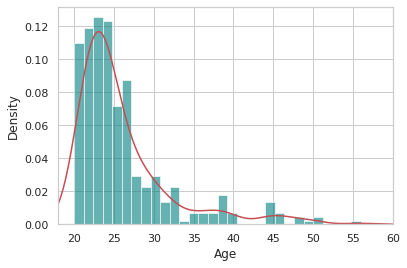

In [ ]:
ax = df["Age"].hist(bins=30, density=True, stacked=True, color='teal', alpha=0.6)
df["Age"].plot(kind='density', color='r')
ax.set(xlabel='Age')
plt.xlim(18,60)
figsize=(10,6)
plt.show()

**Salary**

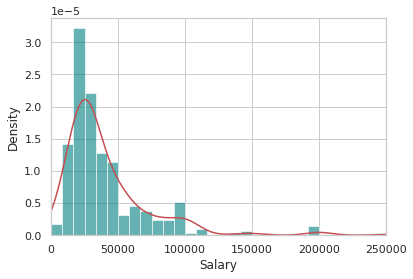

In [ ]:
ax = df["Salary"].hist(bins=30, density=True, stacked=True, color='teal', alpha=0.6)
df["Salary"].plot(kind='density', color='r')
ax.set(xlabel='Salary')
plt.xlim(0,250000)
figsize=(10,6)
plt.show()

**Since both the columns values follows skewed distribution, filling the null values with median is the best course of action.**

In [ ]:
df['Salary'].fillna(df['Salary'].median(),inplace=True)
df['Age'].fillna(df['Age'].median(),inplace=True)



---


**Checking for outliers for numerical columns.**

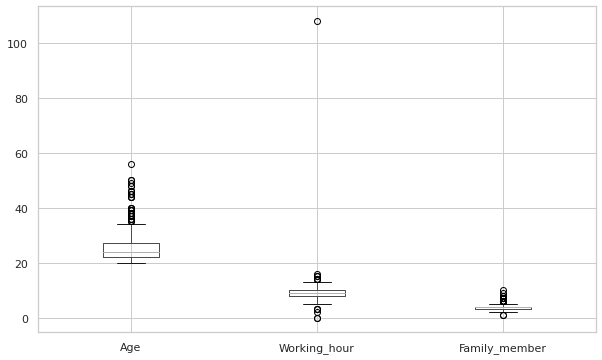

In [ ]:
df.boxplot(return_type='axes',figsize=(10,6),column=['Age','Working_hour','Family_member']);

In [ ]:
df['Working_hour'].replace(108,df['Working_hour'].mean(),inplace=True) #Working hour follows normal distribution filling outlier with mean is best.

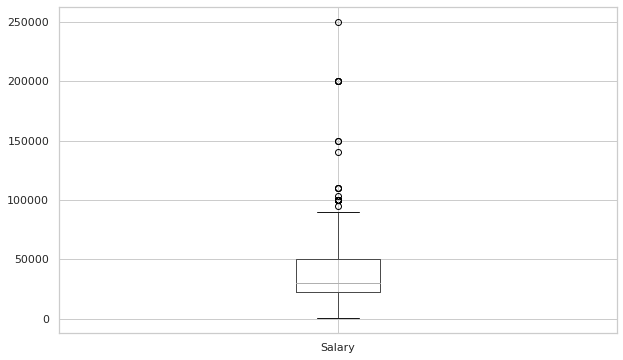

In [ ]:
df.boxplot(return_type='axes',figsize=(10,6),column='Salary');

Outliers has been fixed since salary varies we do not want to change the originality of data and keep salary as it is.

Now the data is clean lets have a quick EDA.

---


##**Quick EDA**

**AGE V|S DEPRESSION**

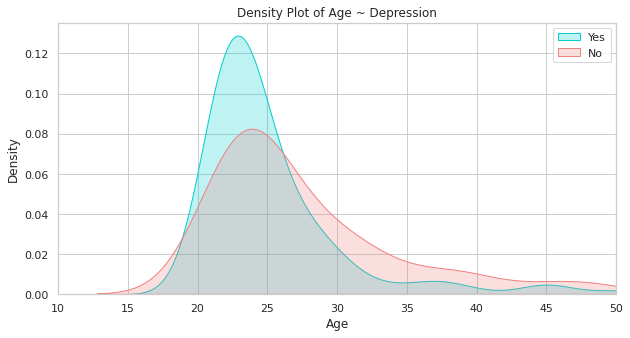

In [ ]:
plt.figure(figsize=(10,5))
x = sns.kdeplot(df["Age"][df.Depression == 'Yes'], color="darkturquoise", shade=True)
sns.kdeplot(df["Age"][df.Depression == 'No'], color="lightcoral", shade=True)
plt.legend(['Yes', 'No'])
plt.title('Density Plot of Age ~ Depression')
x.set(xlabel='Age')
plt.xlim(10,50)
plt.show()

*The age distribution for depression is actually very similar. One notable difference is that, of the people having depression shares a larger proportion on the age group 20-25.*

---

**WORKING HOURS V|S DEPRESSION**

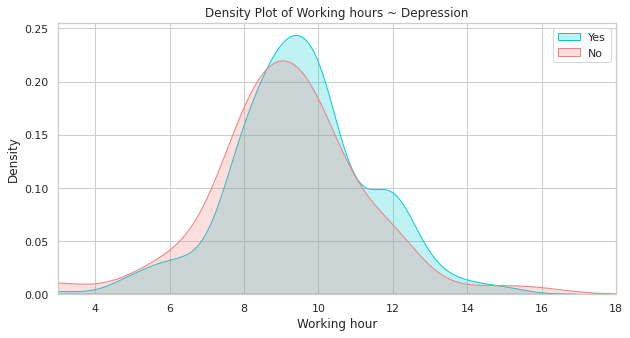

In [ ]:
plt.figure(figsize=(10,5))
x = sns.kdeplot(df["Working_hour"][df.Depression == 'Yes'], color="darkturquoise", shade=True)
sns.kdeplot(df["Working_hour"][df.Depression == 'No'], color="lightcoral", shade=True)
plt.legend(['Yes', 'No'])
plt.title('Density Plot of Working hours ~ Depression')
x.set(xlabel='Working hour')
plt.xlim(3,18)
plt.show()

*The work hours distribution for depression is also very similar,one notable difference is people working more then 11 hours shares a larger portion on having depression.*

---



**SALARY V|S DEPRESSION**

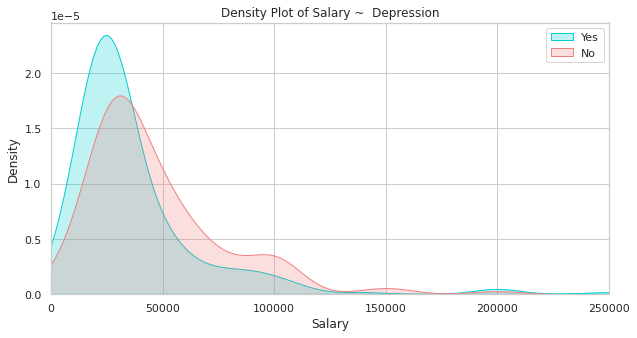

In [ ]:
plt.figure(figsize=(10,5))
x = sns.kdeplot(df["Salary"][df.Depression == 'Yes'], color="darkturquoise", shade=True)
sns.kdeplot(df["Salary"][df.Depression == 'No'], color="lightcoral", shade=True)
plt.legend(['Yes', 'No'])
plt.title('Density Plot of Salary ~  Depression')
x.set(xlabel='Salary')
plt.xlim(0,250000)
plt.show()

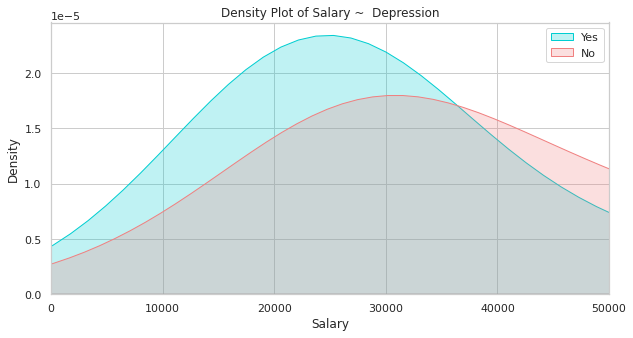

In [ ]:
plt.figure(figsize=(10,5))
x = sns.kdeplot(df["Salary"][df.Depression == 'Yes'], color="darkturquoise", shade=True)
sns.kdeplot(df["Salary"][df.Depression == 'No'], color="lightcoral", shade=True)
plt.legend(['Yes', 'No'])
plt.title('Density Plot of Salary ~  Depression')
x.set(xlabel='Salary')
plt.xlim(0,50000) #For infering graph closely.
plt.show()


*People getting salary less than 35000 shares a larger portion on having depression.*

---

**FAMILY MEMBER V|S DEPRESSION**

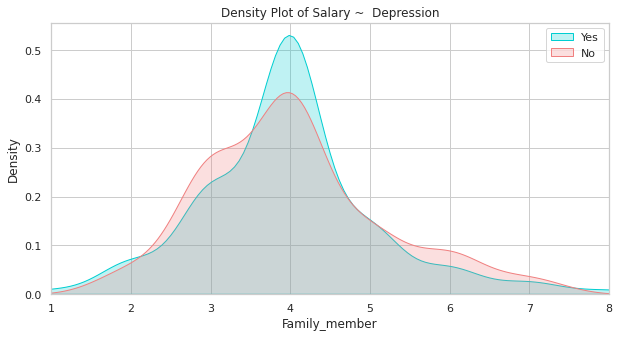

In [ ]:
plt.figure(figsize=(10,5))
x = sns.kdeplot(df["Family_member"][df.Depression == 'Yes'], color="darkturquoise", shade=True)
sns.kdeplot(df["Family_member"][df.Depression == 'No'], color="lightcoral", shade=True)
plt.legend(['Yes', 'No'])
plt.title('Density Plot of Salary ~  Depression')
x.set(xlabel='Family_member')
plt.xlim(1,8)
plt.show()

The Family member distribution for depression is also very similar,one notable difference is people 4 family members shares a larger portion on having depression.

---



**BIVARIATE ANALYSIS**

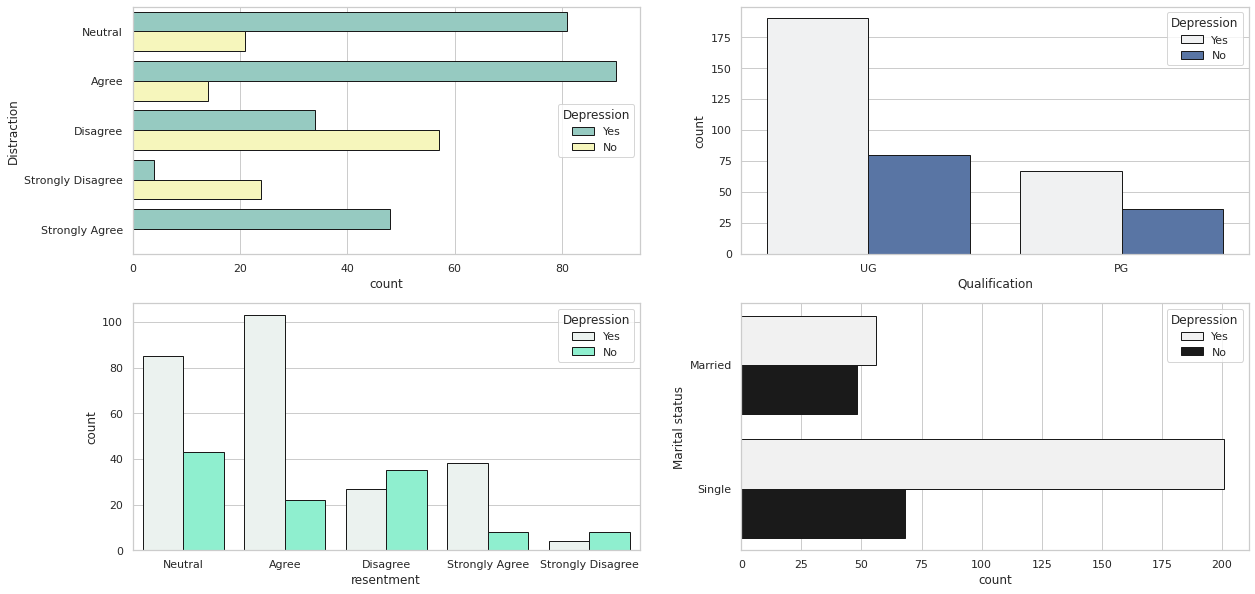

In [ ]:
fig, inf=plt.subplots(nrows=2,ncols=2,figsize=(20,10));
sns.countplot(ax=inf[0, 0],y='Distraction',hue = 'Depression', data=df,palette="Set3",ec='k')
sns.countplot(ax=inf[0, 1],x='Qualification',hue = 'Depression', data=df, color='b',ec='k')
sns.countplot(ax=inf[1, 1],y='Marital status',hue = 'Depression', data=df, color="k",ec='k')
sns.countplot(ax=inf[1, 0],x='resentment',hue = 'Depression', data=df,color="aquamarine",ec='k' )



1.  *People who feel distracted or have neutral felling are more prone to depression.*

2. *People with lower education qualifications are more prone to depression.*

3. *Resentment or treated unfairly by coworkers ~ People who feel it or had a neutral feeling are more prone to depression.*

4. *Single people are more prone to depression when working from home.*

---



In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Depression']=le.fit_transform(df['Depression'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


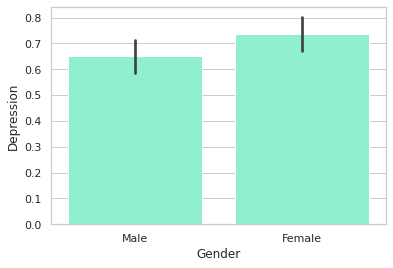

In [ ]:
sns.barplot('Gender', 'Depression', data=df, color="aquamarine")
plt.show();

Gender wise there is no significant difference.

---


**CONVERTING CATEGORICAL COLUMNS TO NUMERICAL.**

All the categorical data are either binary or ordinal type we can go for label encoding.

In [ ]:
df['Gender']=le.fit_transform(df['Gender'])
df['children']=le.fit_transform(df['children'])
df['Qualification']=le.fit_transform(df['Qualification'])
df['Marital status']=le.fit_transform(df['Marital status'])
df['Stress']=le.fit_transform(df['Stress'])
df['Flexible']=le.fit_transform(df['Flexible'])
df['Satisfaction']=le.fit_transform(df['Satisfaction'])
df['Learning']=le.fit_transform(df['Learning'])
df['Isolation']=le.fit_transform(df['Isolation'])
df['Lack_Ts']=le.fit_transform(df['Lack_Ts'])
df['PI_collegue']=le.fit_transform(df['PI_collegue'])
df['IW_Mentor']=le.fit_transform(df['IW_Mentor'])
df['resentment']=le.fit_transform(df['resentment'])
df['Conducive']=le.fit_transform(df['Conducive'])
df['Better_performance']=le.fit_transform(df['Better_performance'])
df['s_family']=le.fit_transform(df['s_family'])
df['Family_time']=le.fit_transform(df['Family_time'])
df['Distraction']=le.fit_transform(df['Distraction'])
df['Depression']=le.fit_transform(df['Depression'])
df['W_L_Balance']=le.fit_transform(df['W_L_Balance'])
df['Confident']=le.fit_transform(df['Confident'])
df['IW_co-worker']=le.fit_transform(df['IW_co-worker'])
df.head(3)

,Age,Gender,Qualification,Marital status,children,Family_member,Salary,Stress,Working_hour,Flexible,Confident,Satisfaction,Learning,Isolation,Lack_Ts,PI_collegue,IW_Mentor,IW_co-worker,resentment,Conducive,Better_performance,s_family,Family_time,Distraction,Depression,W_L_Balance
0,33.0,1,1,0,1,3,200000.0,0,9.0,3,3,2,2,2,4,0,2,0,2,0,2,0,2,2,1,0
1,22.0,0,0,1,0,1,20000.0,0,13.0,0,2,1,2,1,2,3,3,3,2,1,2,0,1,0,1,1
2,27.0,1,0,1,0,4,35000.0,2,10.0,0,2,1,1,0,2,3,0,0,0,1,2,0,4,0,1,2


**Importing the required libraries for fitting the model.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,mean_absolute_error,roc_curve,auc,accuracy_score
from sklearn.naive_bayes import GaussianNB

**DEFINING TARGET VARIABLE AND DEPENDENT FEATURES.**

In [ ]:
x = df.drop(columns=['Depression']) #dropping the target feature
y= df['Depression']  #Target class

In [ ]:
#Spilitting the data.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 19)

**FEATURE SCALING**

Since the categorical data isconverted to numerical but still age,family members,salary,working hours columns might take up high weightage and impact model prediction i.e hampering model's accuracy.

In [ ]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###**FITTING THE MODELS**

**LOGISTIC REGRESSION** ~ since the target variable has two possible outcomes.

In [ ]:
LR_Model=LogisticRegression()
Logestic_Model=LR_Model.fit(X_train,y_train)
Logestic_Model


LogisticRegression()

In [ ]:
logistic= round(accuracy_score(y_test, predict)*100,2)

In [ ]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.64      0.33      0.44        27
           1       0.70      0.90      0.79        48

    accuracy                           0.69        75
   macro avg       0.67      0.61      0.61        75
weighted avg       0.68      0.69      0.66        75



In [ ]:
probs = LR_Model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)


In [ ]:
L_Gini=round(2*roc_auc-1,2)*100
L_AUC=round(roc_auc,2)*100

In [ ]:
print("Accuracy :",round(accuracy_score(y_test, predict)*100,2),'%')

Accuracy : 69.33 %




---


**NAIVE BAYES CLASSIFIER**

Since it predicts the target variable based on Bayes' Theorem.


To fit the model we need to hold onto the assumption i.e,

the likelihood distributions are normal and independent.

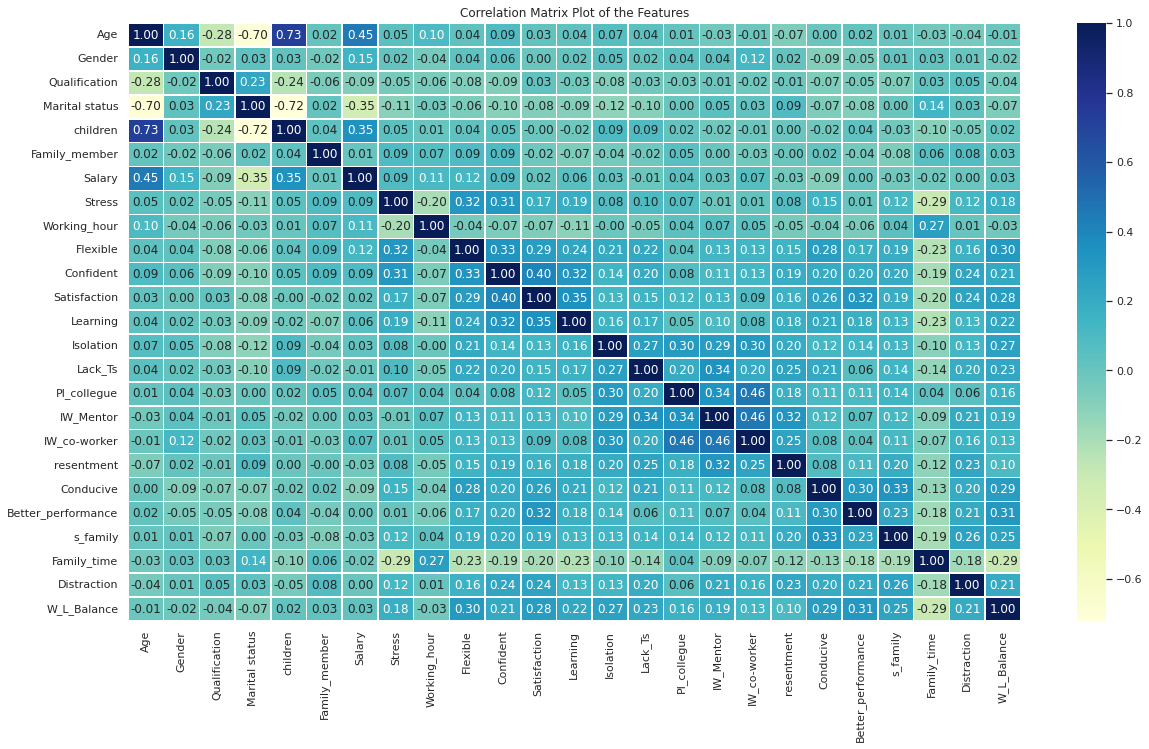

In [ ]:
corr = x.corr()
fig, ax = plt.subplots(figsize = (20,11))
ax = sns.heatmap(corr,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
bottom, top = ax.get_ylim()
plt.title('Correlation Matrix Plot of the Features');

No features shows any significant co-relation.
we are ready to fit our model.

In [ ]:
NB = GaussianNB()
NB.fit(X_train, y_train)

#Predict testing set
y_pred = NB.predict(X_test)


In [ ]:
nb=round(accuracy_score(y_test, y_pred)*100,2)

In [ ]:
probs = NB.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

In [ ]:
N_Gini=round(2*roc_auc-1,2)*100
N_AUC=round(roc_auc,2)*100

In [ ]:
#Check performance of model
print(accuracy_score(y_test, y_pred),'\nAccuracy Score of the model :',round(accuracy_score(y_test, y_pred)*100,2),'%')

0.6666666666666666 
Accuracy Score of the model : 66.67 %



---



**RANDOM FOREST**

Since it can perform both regression and classification tasks and our features needed excatly that.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1,max_depth=7,n_estimators=29)
forest_model.fit(X_train,y_train)
pred_cv_forest=forest_model.predict(X_test)
score_forest = round(accuracy_score(pred_cv_forest,y_test)*100,2)


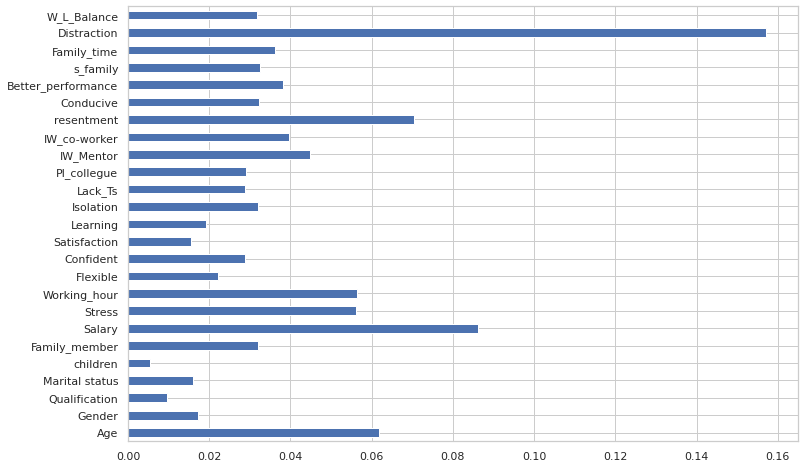

In [ ]:
importances = pd.Series(forest_model.feature_importances_,index=x.columns)
importances.plot(kind='barh', figsize=(12,8))

In [ ]:
probs = forest_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

In [ ]:
R_Gini=round(2*roc_auc-1,2)*100
R_AUC=round(roc_auc,2)*100

In [ ]:
print('Accuracy : ',score_forest)

Accuracy :  81.33


we can find out that Distraction and Age and Salary and resenment feature are most important. So, feature engineering helped us in predicting our target variable.

---


## **Decission Tree**
**Let's dig in deep and identify the order of attributes**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
#Spilitting the data.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 19)

In [ ]:
clf = DecisionTreeClassifier(random_state=12)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
feature_cols = (['Age', 'Gender', 'Qualification', 'Marital status', 'children',
       'Family_member', 'Salary', 'Stress', 'Working_hour', 'Flexible',
       'Confident', 'Satisfaction', 'Learning', 'Isolation', 'Lack_Ts',
       'PI_collegue', 'IW_Mentor', 'IW_co-worker', 'resentment', 'Conducive',
       'Better_performance', 's_family', 'Family_time', 'Distraction',
       'W_L_Balance'])

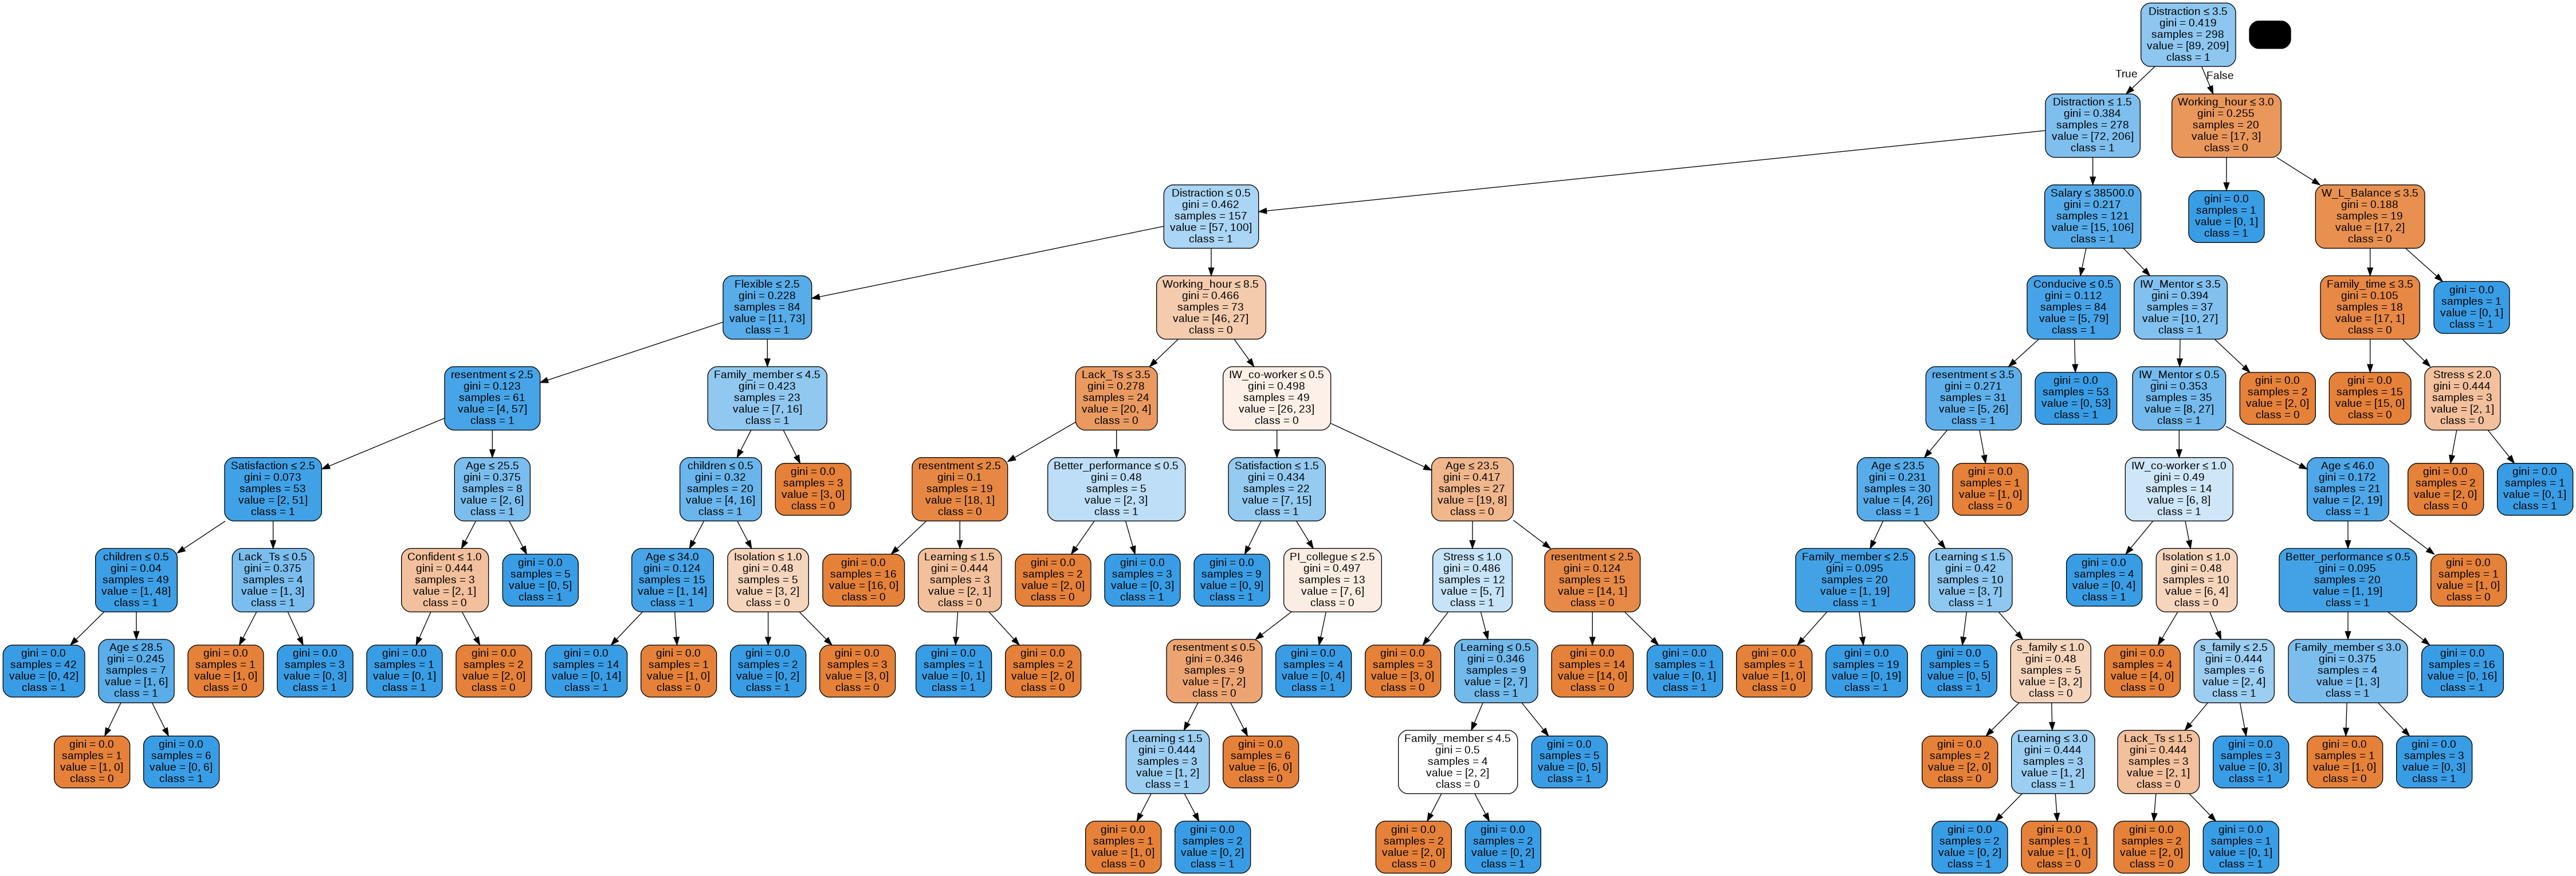

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('work.png')
Image(graph.create_png())

In [ ]:
print("Accuracy :",round(accuracy_score(y_test, y_pred)*100),'%')

Accuracy : 65 %


In [ ]:
decision=round(accuracy_score(y_test, y_pred)*100,2)

In [ ]:
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

In [ ]:
D_Gini=round(2*roc_auc-1,2)*100
D_AUC=round(roc_auc,2)*100



---



**Pruning the tree to make it shorter, simpler, and easier to explain**

**criterion = entropy**

In [ ]:
clf_E = DecisionTreeClassifier(criterion="entropy", max_depth=4,random_state=11)

# Train Decision Tree Classifer
clf_E = clf_E.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_E.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy :",round(accuracy_score(y_test, y_pred)*100),'%') 

Accuracy : 77 %


In [ ]:
probs = clf_E.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

In [ ]:
DE_Gini=round(2*roc_auc-1,2)*100
DE_AUC=round(roc_auc,2)*100

In [ ]:
p_decision_e=round(accuracy_score(y_test, y_pred)*100,2)

**criterion = gini**

In [ ]:
clf_g = DecisionTreeClassifier(criterion="gini", max_depth=4,random_state=11)

# Train Decision Tree Classifer
clf_g = clf_g.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_g.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy :",round(accuracy_score(y_test, y_pred)*100),'%') 

Accuracy : 79 %


In [ ]:
p_decision_Gini=round(accuracy_score(y_test, y_pred)*100,2)

In [ ]:
probs = clf_g.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

In [ ]:
DG_Gini=round(2*roc_auc-1,2)*100
DG_AUC=round(roc_auc,2)*100

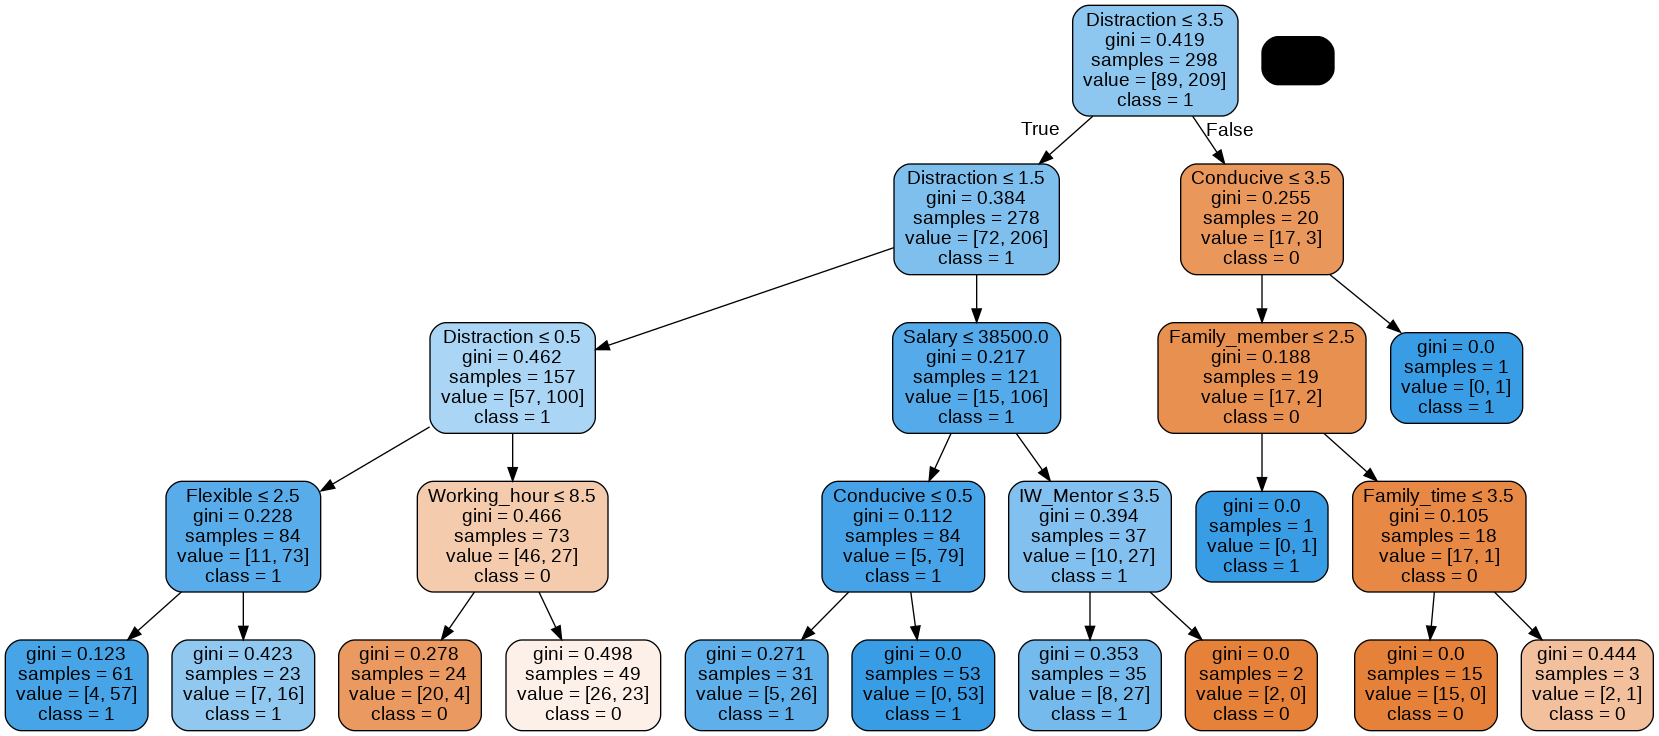

In [ ]:
dot_data = StringIO()
export_graphviz(clf_g, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Depression.png')
Image(graph.create_png())

The accuracy of the pruned model is more compare to original where gini criterion shows the better accuracy.
So we consider it and classify based on it, WHERE we have much simplier,short and explainable diagram and we can classify likelihood of employee vulnarable to depression from minimal number of features.


**Note**

*here for binary variable if it says <= 0.5 it means 0.* 

*and for ordinal variable lower the number they feel it low and vice versa.*

---



### **MODEL PREFERENCE**

In [ ]:
data=[[logistic,L_Gini,L_AUC],
      [nb,N_Gini,N_AUC],
      [score_forest,R_Gini,R_AUC],
      [decision,D_Gini,D_AUC],
      [p_decision_e,DE_Gini,DE_AUC],
      [p_decision_Gini,DG_Gini,DG_AUC]]

In [ ]:
comparision=pd.DataFrame(data,
                        index =['LogisticRegression','Naive bayes','Random forest','DecisionTree','p_decision_entropy','Purn_DecisionTree_Gini'],
                        columns =['Accuracy','Gini','AUC'])
comparision.sort_values(by = ['Accuracy','Gini','AUC'],ascending=False)


,Accuracy,Gini,AUC
Random forest,81.33,71.0,85.0
Purn_DecisionTree_Gini,78.67,54.0,77.0
p_decision_entropy,77.33,56.0,78.0
LogisticRegression,69.33,46.0,73.0
Naive bayes,66.67,52.0,76.0
DecisionTree,65.33,22.0,61.0


*The best model in this case turns out to be RANDOM FOREST followed by Purned Decission tree with gini criterion which gives the best accuracy among all models used.*

---



---



**REPORT**

---


**1. About Data :**

Data set initially consisted of 407 rows and 45 columns, 
Dataset was collected using google forms so its vague and very dirty,

Data set is about effect on individual because of work from home.

**2.  DATA CLEANING**
* Drooped irrevelant columns
* Droped rows with null values
* Renaming columns
* Replaced values with correct formatting/nan if value was not provided.
* Filled those null values with median since the certain columns followed skewed distribution.
* Outlier detection and fixing them.
* Ensured the data is clean

**3. ANALYSIS**
* Age group 20-25 are more prone to depression.
* People working more than 11 hours shares a larger portion on having depression.
* People earning less than 35000 per month shares a larger portion on having depression.
* People who feel distracted or have neutral felling are more prone to depression.

* People with lower education qualifications are more prone to depression.

* Resentment or treated unfairly by coworkers ~ People who feel it or had a neutral feeling are more prone to depression.

* Single people are more prone to depression when working from home.

**4. FEATURE IMPORTANCE**

* Distraction, Age, Salary and resenment feature are most important on predicting likelihood of depression on an employee. Others are also important but not as important as above mentioned.

**5. FEATURE SCALING**
* Converted Cateogorical data to numerical using label encoding since the data type were either binary or ordinal.
* Standardize data ,some columns value had much higher weightage, before feeding it to the model converting features on a similar scale.

**6. FITTING MODEL**
* LOGISTIC REGRESSION
* NAIVE BAYES
* RANDOM FOREST
* DECISSION TREE
* PURNED DECISSION TREE

**7. INFERENCE FROM PURNED DECISSION TREE(criteria = gini) WITH 78% ACCURACY**
* Supports our analysis obtained from EDA, UNIVARIATE and BIVARIATE ANALYSIS, Density plots.
* Next best model after RANDOM FOREST.

**8. MODEL PREFERENCE**
* COMPARISION BETWEEN DIFFERENT CLASSIFICATION MODELS ~
 MEASURING FACTORS WERE ACCURACY, GINI and AUC.
* RANDOM FOREST STANDS OUT TO BE BEST MODEL WITH 81.33% ACCURACY.










---


*Note -* 



*The analysis is based on the data collected from an IT HUB,Chennai in the timeline of DECEMBER,2021. The inference might not be correct for the large population since the data size and its reach were low, Also the inferences are for the effect of work from home on this given time which may change on the future given same population*